In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
# ID붙인 파일로 시작
df = pd.read_excel('data/ID있는버전.xlsx')
df.head(5)

,ID,시군구,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,거래유형
0,서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,80,201801,3,130000,4,1987,언주로 3,-
1,서울특별시 동작구 신대방동 롯데관악타워 150,서울특별시 동작구 신대방동,롯데관악타워,150,201801,4,74000,27,1996,보라매로5길 51,-
2,서울특별시 동작구 신대방동 경남교수 80,서울특별시 동작구 신대방동,경남교수,80,201801,25,65000,17,2001,여의대방로10길 14,-
3,서울특별시 동작구 상도동 힐스테이트 상도 프레스티지 80,서울특별시 동작구 상도동,힐스테이트 상도 프레스티지,80,201801,27,85800,15,2013,상도로 346-2,-
4,서울특별시 동작구 상도동 힐스테이트 상도 프레스티지 120,서울특별시 동작구 상도동,힐스테이트 상도 프레스티지,120,201801,24,104500,12,2013,상도로 346-2,-


In [8]:
# 계약년월을 datetime으로 전환하고, 년도와 분기 생성
df['계약년월'] = pd.to_datetime(df['계약년월'], format='%Y%m')
df['분기'], df['년도'] = (df['계약년월'].dt.quarter, df['계약년월'].dt.year)
df.head(5)

,ID,시군구,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,거래유형,분기,년도
0,서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,80,2018-01-01,3,130000,4,1987,언주로 3,-,1,2018
1,서울특별시 동작구 신대방동 롯데관악타워 150,서울특별시 동작구 신대방동,롯데관악타워,150,2018-01-01,4,74000,27,1996,보라매로5길 51,-,1,2018
2,서울특별시 동작구 신대방동 경남교수 80,서울특별시 동작구 신대방동,경남교수,80,2018-01-01,25,65000,17,2001,여의대방로10길 14,-,1,2018
3,서울특별시 동작구 상도동 힐스테이트 상도 프레스티지 80,서울특별시 동작구 상도동,힐스테이트 상도 프레스티지,80,2018-01-01,27,85800,15,2013,상도로 346-2,-,1,2018
4,서울특별시 동작구 상도동 힐스테이트 상도 프레스티지 120,서울특별시 동작구 상도동,힐스테이트 상도 프레스티지,120,2018-01-01,24,104500,12,2013,상도로 346-2,-,1,2018


In [7]:
# 피벗테이블로 변환, 결측치 확인 가능
table = pd.pivot_table(df, values=['전용면적(㎡)','거래금액(만원)','건축년도'], index=['년도','분기'], columns=['ID'], aggfunc=np.mean)
table.head(5)

거래금액(만원)                                  \
ID      서울특별시 강남구 개포동 개포2차현대아파트 80 서울특별시 강남구 개포동 개포6차우성아파트1동~8동 50   
년도   분기                                                              
2018 1                         NaN                             NaN   
     2                         NaN                        107500.0   
     3                         NaN                        112000.0   
     4                         NaN                             NaN   
2019 1                         NaN                             NaN   

                                                                         \
ID      서울특별시 강남구 개포동 개포6차우성아파트1동~8동 70 서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80   
년도   분기                                                                   
2018 1                              NaN                        129125.0   
     2                              NaN                        145000.0   
     3                              NaN                        160000.0   
     4                              NaN                             NaN   
2019 1                              NaN                             NaN   

                                                                 \
ID      서울특별시 강남구 개포동 개포래미안포레스트 100 서울특별시 강남구 개포동 개포래미안포레스트 140   
년도   분기                                                           
2018 1                          NaN                         NaN   
     2                          NaN                         NaN   
     3                          NaN                         NaN   
     4                          NaN                         NaN   
2019 1                          NaN                         NaN   

                                                               \
ID      서울특별시 강남구 개포동 개포래미안포레스트 50 서울특별시 강남구 개포동 개포래미안포레스트 60   
년도   분기                                                         
2018 1                         NaN                        NaN   
     2                         NaN                        NaN   
     3                         NaN                        NaN   
     4                         NaN                        NaN   
2019 1                         NaN                        NaN   

                                                               ...  \
ID      서울특별시 강남구 개포동 개포래미안포레스트 70 서울특별시 강남구 개포동 개포래미안포레스트 80  ...   
년도   분기                                                        ...   
2018 1                         NaN                        NaN  ...   
     2                         NaN                        NaN  ...   
     3                         NaN                        NaN  ...   
     4                         NaN                        NaN  ...   
2019 1                         NaN                        NaN  ...   

                       전용면적(㎡)                                            \
ID      서울특별시 중랑구 중화동 한신아파트 80 서울특별시 중랑구 중화동 한영 100 서울특별시 중랑구 중화동 한영 110   
년도   분기                                                                    
2018 1                    80.0                  NaN                  NaN   
     2                    80.0                  NaN                  NaN   
     3                    80.0                  NaN                  NaN   
     4                    80.0                  NaN                  NaN   
2019 1                    80.0                  NaN                  NaN   

                                                                      \
ID      서울특별시 중랑구 중화동 한영 120 서울특별시 중랑구 중화동 한영 60 서울특별시 중랑구 중화동 한영 70   
년도   분기                                                                
2018 1                   NaN                 NaN                 NaN   
     2                   NaN                 NaN                70.0   
     3                   NaN                60.0                70.0   
     4                   NaN                 NaN                70.0   
2019 1                   NaN                 NaN                 NaN   

                                                           

In [10]:
# 보스턴 데이터에서 배껴온 널값 지우기
check_null = table.isna().sum() / 18

# columns of null ratio >= 0.5
check_null[check_null >= 0.5]
# remove columns of null ratio >= 0.5
remove_cols = check_null[check_null >= 0.5].keys()
table = table.drop(remove_cols, axis=1)

table.head(5)

거래금액(만원)                           \
ID      서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80 서울특별시 강남구 개포동 개포주공1단지 40   
년도   분기                                                            
2018 1                         129125.0            145736.842105   
     2                         145000.0            162587.500000   
     3                         160000.0            167687.500000   
     4                              NaN            150000.000000   
2019 1                              NaN            142500.000000   

                                                           \
ID      서울특별시 강남구 개포동 개포주공5단지 60 서울특별시 강남구 개포동 개포주공5단지 80   
년도   분기                                                     
2018 1             136666.666667                      NaN   
     2             129500.000000                      NaN   
     3             125000.000000            177416.666667   
     4                       NaN            141000.000000   
2019 1             134500.000000            176000.000000   

                                                           \
ID      서울특별시 강남구 개포동 개포주공6단지 50 서울특별시 강남구 개포동 개포주공6단지 60   
년도   분기                                                     
2018 1                  125900.0            135200.000000   
     2                  128000.0            131650.000000   
     3                  118500.0            137000.000000   
     4                       NaN                      NaN   
2019 1                  118000.0            132666.666667   

                                                           \
ID      서울특별시 강남구 개포동 개포주공6단지 70 서울특별시 강남구 개포동 개포주공6단지 80   
년도   분기                                                     
2018 1                  151500.0                 163500.0   
     2                  150500.0                      NaN   
     3                  161525.0                 164500.0   
     4                  162500.0                      NaN   
2019 1                  152000.0                      NaN   

                                                           ...  \
ID      서울특별시 강남구 개포동 개포주공7단지 50 서울특별시 강남구 개포동 개포주공7단지 60  ...   
년도   분기                                                    ...   
2018 1                  120300.0                 134750.0  ...   
     2                       NaN                 127500.0  ...   
     3                  143000.0                 141000.0  ...   
     4                       NaN                      NaN  ...   
2019 1                  119000.0                 131250.0  ...   

                          전용면적(㎡)                            \
ID      서울특별시 중랑구 신내동 화성.두산아파트 70 서울특별시 중랑구 신내동 화성.두산아파트 80   
년도   분기                                                       
2018 1                       70.0                      80.0   
     2                       70.0                      80.0   
     3                       70.0                      80.0   
     4                       70.0                       NaN   
2019 1                       70.0                      80.0   

                                                                           \
ID      서울특별시 중랑구 중화동 극동 80 서울특별시 중랑구 중화동 동양엔파트 80 서울특별시 중랑구 중화동 범양프레체 20   
년도   분기                                                                     
2018 1                 80.0                   80.0                   20.0   
     2                 80.0                   80.0                   20.0   
     3                 80.0                   80.0                   20.0   
     4                 80.0                   80.0                   20.0   
2019 1                 80.0                   80.0                   20.0   

                                                          \
ID      서울특별시 중랑구 중화동 중화동건영아파트 60 서울특별시 중랑구 중화동 태능에셈빌 80   
년도   분기                                                    
2018 1                       60.0                   80.0   
     2                       60.0                   80.0   
     3                       60.0                   80.0   
     4  

In [12]:
# 결측치 채우기, 평균값이 아니라 앞뒤의 값을 붙여줌
table.fillna(method='ffill', inplace=True)
table.fillna(method='bfill', inplace=True)
table.head(5)

거래금액(만원)                           \
ID      서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80 서울특별시 강남구 개포동 개포주공1단지 40   
년도   분기                                                            
2018 1                         129125.0            145736.842105   
     2                         145000.0            162587.500000   
     3                         160000.0            167687.500000   
     4                         160000.0            150000.000000   
2019 1                         160000.0            142500.000000   

                                                           \
ID      서울특별시 강남구 개포동 개포주공5단지 60 서울특별시 강남구 개포동 개포주공5단지 80   
년도   분기                                                     
2018 1             136666.666667            177416.666667   
     2             129500.000000            177416.666667   
     3             125000.000000            177416.666667   
     4             125000.000000            141000.000000   
2019 1             134500.000000            176000.000000   

                                                           \
ID      서울특별시 강남구 개포동 개포주공6단지 50 서울특별시 강남구 개포동 개포주공6단지 60   
년도   분기                                                     
2018 1                  125900.0            135200.000000   
     2                  128000.0            131650.000000   
     3                  118500.0            137000.000000   
     4                  118500.0            137000.000000   
2019 1                  118000.0            132666.666667   

                                                           \
ID      서울특별시 강남구 개포동 개포주공6단지 70 서울특별시 강남구 개포동 개포주공6단지 80   
년도   분기                                                     
2018 1                  151500.0                 163500.0   
     2                  150500.0                 163500.0   
     3                  161525.0                 164500.0   
     4                  162500.0                 164500.0   
2019 1                  152000.0                 164500.0   

                                                           ...  \
ID      서울특별시 강남구 개포동 개포주공7단지 50 서울특별시 강남구 개포동 개포주공7단지 60  ...   
년도   분기                                                    ...   
2018 1                  120300.0                 134750.0  ...   
     2                  120300.0                 127500.0  ...   
     3                  143000.0                 141000.0  ...   
     4                  143000.0                 141000.0  ...   
2019 1                  119000.0                 131250.0  ...   

                          전용면적(㎡)                            \
ID      서울특별시 중랑구 신내동 화성.두산아파트 70 서울특별시 중랑구 신내동 화성.두산아파트 80   
년도   분기                                                       
2018 1                       70.0                      80.0   
     2                       70.0                      80.0   
     3                       70.0                      80.0   
     4                       70.0                      80.0   
2019 1                       70.0                      80.0   

                                                                           \
ID      서울특별시 중랑구 중화동 극동 80 서울특별시 중랑구 중화동 동양엔파트 80 서울특별시 중랑구 중화동 범양프레체 20   
년도   분기                                                                     
2018 1                 80.0                   80.0                   20.0   
     2                 80.0                   80.0                   20.0   
     3                 80.0                   80.0                   20.0   
     4                 80.0                   80.0                   20.0   
2019 1                 80.0                   80.0                   20.0   

                                                          \
ID      서울특별시 중랑구 중화동 중화동건영아파트 60 서울특별시 중랑구 중화동 태능에셈빌 80   
년도   분기                                                    
2018 1                       60.0                   80.0   
     2                       60.0                   80.0   
     3                       60.0                   80.0   
     4  

In [16]:
# 라벨값과 데이터 분리1
data_table = table[['전용면적(㎡)','건축년도']]
data_table.head(5)

전용면적(㎡)                           \
ID      서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80 서울특별시 강남구 개포동 개포주공1단지 40   
년도   분기                                                            
2018 1                             80.0                     40.0   
     2                             80.0                     40.0   
     3                             80.0                     40.0   
     4                             80.0                     40.0   
2019 1                             80.0                     40.0   

                                                           \
ID      서울특별시 강남구 개포동 개포주공5단지 60 서울특별시 강남구 개포동 개포주공5단지 80   
년도   분기                                                     
2018 1                      60.0                     80.0   
     2                      60.0                     80.0   
     3                      60.0                     80.0   
     4                      60.0                     80.0   
2019 1                      60.0                     80.0   

                                                           \
ID      서울특별시 강남구 개포동 개포주공6단지 50 서울특별시 강남구 개포동 개포주공6단지 60   
년도   분기                                                     
2018 1                      50.0                     60.0   
     2                      50.0                     60.0   
     3                      50.0                     60.0   
     4                      50.0                     60.0   
2019 1                      50.0                     60.0   

                                                           \
ID      서울특별시 강남구 개포동 개포주공6단지 70 서울특별시 강남구 개포동 개포주공6단지 80   
년도   분기                                                     
2018 1                      70.0                     80.0   
     2                      70.0                     80.0   
     3                      70.0                     80.0   
     4                      70.0                     80.0   
2019 1                      70.0                     80.0   

                                                           ...  \
ID      서울특별시 강남구 개포동 개포주공7단지 50 서울특별시 강남구 개포동 개포주공7단지 60  ...   
년도   분기                                                    ...   
2018 1                      50.0                     60.0  ...   
     2                      50.0                     60.0  ...   
     3                      50.0                     60.0  ...   
     4                      50.0                     60.0  ...   
2019 1                      50.0                     60.0  ...   

                             건축년도                            \
ID      서울특별시 중랑구 신내동 화성.두산아파트 70 서울특별시 중랑구 신내동 화성.두산아파트 80   
년도   분기                                                       
2018 1                     1995.0                    1995.0   
     2                     1995.0                    1995.0   
     3                     1995.0                    1995.0   
     4                     1995.0                    1995.0   
2019 1                     1995.0                    1995.0   

                                                                           \
ID      서울특별시 중랑구 중화동 극동 80 서울특별시 중랑구 중화동 동양엔파트 80 서울특별시 중랑구 중화동 범양프레체 20   
년도   분기                                                                     
2018 1               1991.0                 2010.0                 2012.0   
     2               1991.0                 2010.0                 2012.0   
     3               1991.0                 2010.0                 2012.0   
     4               1991.0                 2010.0                 2012.0   
2019 1               1991.0                 2010.0                 2012.0   

                                                          \
ID      서울특별시 중랑구 중화동 중화동건영아파트 60 서울특별시 중랑구 중화동 태능에셈빌 80   
년도   분기                                                    
2018 1                     1998.0                 2005.0   
     2                     1998.0                 2005.0   
     3                     1998.0                 2005.0   
     4   

In [20]:
# 라벨값과 데이터 분리2
label_table = table['거래금액(만원)']
label_table.head(5)

ID       서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80  서울특별시 강남구 개포동 개포주공1단지 40  \
년도   분기                                                              
2018 1                          129125.0             145736.842105   
     2                          145000.0             162587.500000   
     3                          160000.0             167687.500000   
     4                          160000.0             150000.000000   
2019 1                          160000.0             142500.000000   

ID       서울특별시 강남구 개포동 개포주공5단지 60  서울특별시 강남구 개포동 개포주공5단지 80  \
년도   분기                                                       
2018 1              136666.666667             177416.666667   
     2              129500.000000             177416.666667   
     3              125000.000000             177416.666667   
     4              125000.000000             141000.000000   
2019 1              134500.000000             176000.000000   

ID       서울특별시 강남구 개포동 개포주공6단지 50  서울특별시 강남구 개포동 개포주공6단지 60  \
년도   분기                                                       
2018 1                   125900.0             135200.000000   
     2                   128000.0             131650.000000   
     3                   118500.0             137000.000000   
     4                   118500.0             137000.000000   
2019 1                   118000.0             132666.666667   

ID       서울특별시 강남구 개포동 개포주공6단지 70  서울특별시 강남구 개포동 개포주공6단지 80  \
년도   분기                                                       
2018 1                   151500.0                  163500.0   
     2                   150500.0                  163500.0   
     3                   161525.0                  164500.0   
     4                   162500.0                  164500.0   
2019 1                   152000.0                  164500.0   

ID       서울특별시 강남구 개포동 개포주공7단지 50  서울특별시 강남구 개포동 개포주공7단지 60  ...  \
년도   분기                                                      ...   
2018 1                   120300.0                  134750.0  ...   
     2                   120300.0                  127500.0  ...   
     3                   143000.0                  141000.0  ...   
     4                   143000.0                  141000.0  ...   
2019 1                   119000.0                  131250.0  ...   

ID       서울특별시 중랑구 신내동 화성.두산아파트 70  서울특별시 중랑구 신내동 화성.두산아파트 80  \
년도   분기                                                         
2018 1                36777.272727                   40925.00   
     2                37095.454545                   43818.75   
     3                40970.000000                   48875.00   
     4                46200.000000                   48875.00   
2019 1                42750.000000                   52000.00   

ID       서울특별시 중랑구 중화동 극동 80  서울특별시 중랑구 중화동 동양엔파트 80  서울특별시 중랑구 중화동 범양프레체 20  \
년도   분기                                                                        
2018 1               36300.0            44000.000000            12200.000000   
     2               34125.0            45233.333333            11983.333333   
     3               36550.0            50666.666667            11650.000000   
     4               38500.0            50000.000000            11375.000000   
2019 1               38000.0            53000.000000            12050.000000   

ID       서울특별시 중랑구 중화동 중화동건영아파트 60  서울특별시 중랑구 중화동 태능에셈빌 80  \
년도   분기                                                      
2018 1                25000.000000                 35000.0   
     2                27000.000000                 36875.0   
     3                25233.333333                 39000.0   
     4                26333.333333                 39000.0   
2019 1                26333.333333                 42500.0   

ID       서울특별시 중랑구 중화동 한신아파트 50  서울특별시 중랑구 중화동 한신아파트 60  \
년도   분기                                                   
2018 1                 31756.25            36534.615385   
     2                 32190.00            38387.500000   
     3            

In [18]:
# 피벗테이블 해체1, 피쳐가 여러개인 데이터에만 사용 라벨에 쓰면 이상해짐
data_table.columns = ['/'.join(col) for col in data_table.columns]
data_table.head(5)

전용면적(㎡)/서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80  \
년도   분기                                            
2018 1                                      80.0   
     2                                      80.0   
     3                                      80.0   
     4                                      80.0   
2019 1                                      80.0   

         전용면적(㎡)/서울특별시 강남구 개포동 개포주공1단지 40  전용면적(㎡)/서울특별시 강남구 개포동 개포주공5단지 60  \
년도   분기                                                                       
2018 1                               40.0                              60.0   
     2                               40.0                              60.0   
     3                               40.0                              60.0   
     4                               40.0                              60.0   
2019 1                               40.0                              60.0   

         전용면적(㎡)/서울특별시 강남구 개포동 개포주공5단지 80  전용면적(㎡)/서울특별시 강남구 개포동 개포주공6단지 50  \
년도   분기                                                                       
2018 1                               80.0                              50.0   
     2                               80.0                              50.0   
     3                               80.0                              50.0   
     4                               80.0                              50.0   
2019 1                               80.0                              50.0   

         전용면적(㎡)/서울특별시 강남구 개포동 개포주공6단지 60  전용면적(㎡)/서울특별시 강남구 개포동 개포주공6단지 70  \
년도   분기                                                                       
2018 1                               60.0                              70.0   
     2                               60.0                              70.0   
     3                               60.0                              70.0   
     4                               60.0                              70.0   
2019 1                               60.0                              70.0   

         전용면적(㎡)/서울특별시 강남구 개포동 개포주공6단지 80  전용면적(㎡)/서울특별시 강남구 개포동 개포주공7단지 50  \
년도   분기                                                                       
2018 1                               80.0                              50.0   
     2                               80.0                              50.0   
     3                               80.0                              50.0   
     4                               80.0                              50.0   
2019 1                               80.0                              50.0   

         전용면적(㎡)/서울특별시 강남구 개포동 개포주공7단지 60  ...  \
년도   분기                                    ...   
2018 1                               60.0  ...   
     2                               60.0  ...   
     3                               60.0  ...   
     4                               60.0  ...   
2019 1                               60.0  ...   

         건축년도/서울특별시 중랑구 신내동 화성.두산아파트 70  건축년도/서울특별시 중랑구 신내동 화성.두산아파트 80  \
년도   분기                                                                   
2018 1                           1995.0                          1995.0   
     2                           1995.0                          1995.0   
     3                           1995.0                          1995.0   
     4                           1995.0                          1995.0   
2019 1                           1995.0                          1995.0   

         건축년도/서울특별시 중랑구 중화동 극동 80  건축년도/서울특별시 중랑구 중화동 동양엔파트 80  \
년도   분기                                                          
2018 1                     1991.0                       2010.0   
     2                     1991.0                       2010.0   
     3                     1991.0                       2010.0   
     4                     1991.0                       2010.0   
2019 1                     1991.0                       2010.0   

         건축년도/서울특별시 중랑구 중화동 범양프레체 20  건축년도/서울특별시 중랑구 중화동 중화동건영아파트 60  \
년도   분기         

In [22]:
# 피벗테이블 해체2, 멀티인덱스 제거
data = data_table.reset_index()
data.head(5)

,년도,분기,전용면적(㎡)/서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80,전용면적(㎡)/서울특별시 강남구 개포동 개포주공1단지 40,전용면적(㎡)/서울특별시 강남구 개포동 개포주공5단지 60,전용면적(㎡)/서울특별시 강남구 개포동 개포주공5단지 80,전용면적(㎡)/서울특별시 강남구 개포동 개포주공6단지 50,전용면적(㎡)/서울특별시 강남구 개포동 개포주공6단지 60,전용면적(㎡)/서울특별시 강남구 개포동 개포주공6단지 70,전용면적(㎡)/서울특별시 강남구 개포동 개포주공6단지 80,...,건축년도/서울특별시 중랑구 신내동 화성.두산아파트 70,건축년도/서울특별시 중랑구 신내동 화성.두산아파트 80,건축년도/서울특별시 중랑구 중화동 극동 80,건축년도/서울특별시 중랑구 중화동 동양엔파트 80,건축년도/서울특별시 중랑구 중화동 범양프레체 20,건축년도/서울특별시 중랑구 중화동 중화동건영아파트 60,건축년도/서울특별시 중랑구 중화동 태능에셈빌 80,건축년도/서울특별시 중랑구 중화동 한신아파트 50,건축년도/서울특별시 중랑구 중화동 한신아파트 60,건축년도/서울특별시 중랑구 중화동 한신아파트 80
0,2018,1,80.0,40.0,60.0,80.0,50.0,60.0,70.0,80.0,...,1995.0,1995.0,1991.0,2010.0,2012.0,1998.0,2005.0,1997.0,1997.115385,1997.294118
1,2018,2,80.0,40.0,60.0,80.0,50.0,60.0,70.0,80.0,...,1995.0,1995.0,1991.0,2010.0,2012.0,1998.0,2005.0,1997.0,1997.000000,1997.400000
2,2018,3,80.0,40.0,60.0,80.0,50.0,60.0,70.0,80.0,...,1995.0,1995.0,1991.0,2010.0,2012.0,1998.0,2005.0,1997.0,1997.214286,1997.166667
3,2018,4,80.0,40.0,60.0,80.0,50.0,60.0,70.0,80.0,...,1995.0,1995.0,1991.0,2010.0,2012.0,1998.0,2005.0,1997.0,1997.000000,1997.000000
4,2019,1,80.0,40.0,60.0,80.0,50.0,60.0,70.0,80.0,...,1995.0,1995.0,1991.0,2010.0,2012.0,1998.0,2005.0,1997.0,1997.000000,1997.500000


In [23]:
# 인덱스 만들어주기, 데이터는 끝
data['분기'] = data[['년도','분기']].apply(lambda row:'/'.join(row.values.astype(str)), axis=1)
data.set_index(data['분기'], inplace=True)
del data['분기']
del data['년도']
data.head(5)

,전용면적(㎡)/서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80,전용면적(㎡)/서울특별시 강남구 개포동 개포주공1단지 40,전용면적(㎡)/서울특별시 강남구 개포동 개포주공5단지 60,전용면적(㎡)/서울특별시 강남구 개포동 개포주공5단지 80,전용면적(㎡)/서울특별시 강남구 개포동 개포주공6단지 50,전용면적(㎡)/서울특별시 강남구 개포동 개포주공6단지 60,전용면적(㎡)/서울특별시 강남구 개포동 개포주공6단지 70,전용면적(㎡)/서울특별시 강남구 개포동 개포주공6단지 80,전용면적(㎡)/서울특별시 강남구 개포동 개포주공7단지 50,전용면적(㎡)/서울특별시 강남구 개포동 개포주공7단지 60,...,건축년도/서울특별시 중랑구 신내동 화성.두산아파트 70,건축년도/서울특별시 중랑구 신내동 화성.두산아파트 80,건축년도/서울특별시 중랑구 중화동 극동 80,건축년도/서울특별시 중랑구 중화동 동양엔파트 80,건축년도/서울특별시 중랑구 중화동 범양프레체 20,건축년도/서울특별시 중랑구 중화동 중화동건영아파트 60,건축년도/서울특별시 중랑구 중화동 태능에셈빌 80,건축년도/서울특별시 중랑구 중화동 한신아파트 50,건축년도/서울특별시 중랑구 중화동 한신아파트 60,건축년도/서울특별시 중랑구 중화동 한신아파트 80
분기,,,,,,,,,,,,,,,,,,,,,
2018/1,80.0,40.0,60.0,80.0,50.0,60.0,70.0,80.0,50.0,60.0,...,1995.0,1995.0,1991.0,2010.0,2012.0,1998.0,2005.0,1997.0,1997.115385,1997.294118
2018/2,80.0,40.0,60.0,80.0,50.0,60.0,70.0,80.0,50.0,60.0,...,1995.0,1995.0,1991.0,2010.0,2012.0,1998.0,2005.0,1997.0,1997.000000,1997.400000
2018/3,80.0,40.0,60.0,80.0,50.0,60.0,70.0,80.0,50.0,60.0,...,1995.0,1995.0,1991.0,2010.0,2012.0,1998.0,2005.0,1997.0,1997.214286,1997.166667
2018/4,80.0,40.0,60.0,80.0,50.0,60.0,70.0,80.0,50.0,60.0,...,1995.0,1995.0,1991.0,2010.0,2012.0,1998.0,2005.0,1997.0,1997.000000,1997.000000
2019/1,80.0,40.0,60.0,80.0,50.0,60.0,70.0,80.0,50.0,60.0,...,1995.0,1995.0,1991.0,2010.0,2012.0,1998.0,2005.0,1997.0,1997.000000,1997.500000


In [24]:
label = label_table.reset_index()
label.head(5)

ID,년도,분기,서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80,서울특별시 강남구 개포동 개포주공1단지 40,서울특별시 강남구 개포동 개포주공5단지 60,서울특별시 강남구 개포동 개포주공5단지 80,서울특별시 강남구 개포동 개포주공6단지 50,서울특별시 강남구 개포동 개포주공6단지 60,서울특별시 강남구 개포동 개포주공6단지 70,서울특별시 강남구 개포동 개포주공6단지 80,...,서울특별시 중랑구 신내동 화성.두산아파트 70,서울특별시 중랑구 신내동 화성.두산아파트 80,서울특별시 중랑구 중화동 극동 80,서울특별시 중랑구 중화동 동양엔파트 80,서울특별시 중랑구 중화동 범양프레체 20,서울특별시 중랑구 중화동 중화동건영아파트 60,서울특별시 중랑구 중화동 태능에셈빌 80,서울특별시 중랑구 중화동 한신아파트 50,서울특별시 중랑구 중화동 한신아파트 60,서울특별시 중랑구 중화동 한신아파트 80
0,2018,1,129125.0,145736.842105,136666.666667,177416.666667,125900.0,135200.000000,151500.0,163500.0,...,36777.272727,40925.00,36300.0,44000.000000,12200.000000,25000.000000,35000.0,31756.25,36534.615385,45081.176471
1,2018,2,145000.0,162587.500000,129500.000000,177416.666667,128000.0,131650.000000,150500.0,163500.0,...,37095.454545,43818.75,34125.0,45233.333333,11983.333333,27000.000000,36875.0,32190.00,38387.500000,48300.000000
2,2018,3,160000.0,167687.500000,125000.000000,177416.666667,118500.0,137000.000000,161525.0,164500.0,...,40970.000000,48875.00,36550.0,50666.666667,11650.000000,25233.333333,39000.0,35400.00,40592.857143,48375.000000
3,2018,4,160000.0,150000.000000,125000.000000,141000.000000,118500.0,137000.000000,162500.0,164500.0,...,46200.000000,48875.00,38500.0,50000.000000,11375.000000,26333.333333,39000.0,36875.00,44210.000000,54900.000000
4,2019,1,160000.0,142500.000000,134500.000000,176000.000000,118000.0,132666.666667,152000.0,164500.0,...,42750.000000,52000.00,38000.0,53000.000000,12050.000000,26333.333333,42500.0,36300.00,42300.000000,48200.000000


In [25]:
label['분기'] = label[['년도','분기']].apply(lambda row:'/'.join(row.values.astype(str)), axis=1)
label.set_index(label['분기'], inplace=True)
del label['분기']
del label['년도']
label.head(5)

ID,서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80,서울특별시 강남구 개포동 개포주공1단지 40,서울특별시 강남구 개포동 개포주공5단지 60,서울특별시 강남구 개포동 개포주공5단지 80,서울특별시 강남구 개포동 개포주공6단지 50,서울특별시 강남구 개포동 개포주공6단지 60,서울특별시 강남구 개포동 개포주공6단지 70,서울특별시 강남구 개포동 개포주공6단지 80,서울특별시 강남구 개포동 개포주공7단지 50,서울특별시 강남구 개포동 개포주공7단지 60,...,서울특별시 중랑구 신내동 화성.두산아파트 70,서울특별시 중랑구 신내동 화성.두산아파트 80,서울특별시 중랑구 중화동 극동 80,서울특별시 중랑구 중화동 동양엔파트 80,서울특별시 중랑구 중화동 범양프레체 20,서울특별시 중랑구 중화동 중화동건영아파트 60,서울특별시 중랑구 중화동 태능에셈빌 80,서울특별시 중랑구 중화동 한신아파트 50,서울특별시 중랑구 중화동 한신아파트 60,서울특별시 중랑구 중화동 한신아파트 80
분기,,,,,,,,,,,,,,,,,,,,,
2018/1,129125.0,145736.842105,136666.666667,177416.666667,125900.0,135200.000000,151500.0,163500.0,120300.0,134750.0,...,36777.272727,40925.00,36300.0,44000.000000,12200.000000,25000.000000,35000.0,31756.25,36534.615385,45081.176471
2018/2,145000.0,162587.500000,129500.000000,177416.666667,128000.0,131650.000000,150500.0,163500.0,120300.0,127500.0,...,37095.454545,43818.75,34125.0,45233.333333,11983.333333,27000.000000,36875.0,32190.00,38387.500000,48300.000000
2018/3,160000.0,167687.500000,125000.000000,177416.666667,118500.0,137000.000000,161525.0,164500.0,143000.0,141000.0,...,40970.000000,48875.00,36550.0,50666.666667,11650.000000,25233.333333,39000.0,35400.00,40592.857143,48375.000000
2018/4,160000.0,150000.000000,125000.000000,141000.000000,118500.0,137000.000000,162500.0,164500.0,143000.0,141000.0,...,46200.000000,48875.00,38500.0,50000.000000,11375.000000,26333.333333,39000.0,36875.00,44210.000000,54900.000000
2019/1,160000.0,142500.000000,134500.000000,176000.000000,118000.0,132666.666667,152000.0,164500.0,119000.0,131250.0,...,42750.000000,52000.00,38000.0,53000.000000,12050.000000,26333.333333,42500.0,36300.00,42300.000000,48200.000000


### 깃허브 보고 쓰는 코드

c:\Users\2005-009\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\2005-009\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\2005-009\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\2005-009\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory le

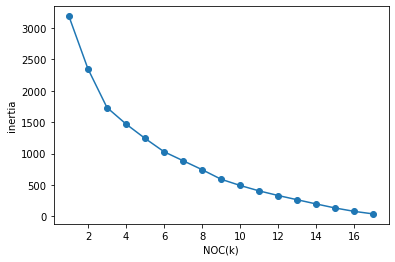

In [34]:
# 최적의 k값 찾기-실패-일단 6개인걸로 간주
num_clusters = list(range(1,18))
inertias = []

for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(data)
    inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
plt.xlabel('NOC(k)')
plt.ylabel('inertia')
plt.show()

In [39]:
# 망함
mm = MinMaxScaler()
data_mm = mm.fit_transform(data)
pd.DataFrame(data_mm).head(5)

,0,1,2,3,4,5,6,7,8,9,...,8316,8317,8318,8319,8320,8321,8322,8323,8324,8325
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.403846,0.367647
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.500000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.750000,0.208333
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.625000
